# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Skillfactory---Практический-Machine-Learning" data-toc-modified-id="Skillfactory---Практический-Machine-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Skillfactory - Практический Machine Learning</a></div><div class="lev2 toc-item"><a href="#15/02/2018---Методы-регрессии" data-toc-modified-id="15/02/2018---Методы-регрессии-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>15/02/2018 - Методы регрессии</a></div><div class="lev2 toc-item"><a href="#Функции-потерь" data-toc-modified-id="Функции-потерь-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Функции потерь</a></div><div class="lev1 toc-item"><a href="#Алгоритмы" data-toc-modified-id="Алгоритмы-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Алгоритмы</a></div><div class="lev2 toc-item"><a href="#Метод-ближайшего-соседа" data-toc-modified-id="Метод-ближайшего-соседа-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Метод ближайшего соседа</a></div><div class="lev2 toc-item"><a href="#Деревья-решений" data-toc-modified-id="Деревья-решений-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Деревья решений</a></div><div class="lev2 toc-item"><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Линейная регрессия</a></div><div class="lev3 toc-item"><a href="#Normal-Equation" data-toc-modified-id="Normal-Equation-231"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Normal Equation</a></div><div class="lev4 toc-item"><a href="#Задачка" data-toc-modified-id="Задачка-2311"><span class="toc-item-num">2.3.1.1&nbsp;&nbsp;</span>Задачка</a></div><div class="lev3 toc-item"><a href="#Градиентный-спуск" data-toc-modified-id="Градиентный-спуск-232"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Градиентный спуск</a></div><div class="lev3 toc-item"><a href="#Природа-зависимости" data-toc-modified-id="Природа-зависимости-233"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Природа зависимости</a></div><div class="lev4 toc-item"><a href="#Пример" data-toc-modified-id="Пример-2331"><span class="toc-item-num">2.3.3.1&nbsp;&nbsp;</span>Пример</a></div><div class="lev2 toc-item"><a href="#Ладно,-давайте-дальше-в-sklearn-=)" data-toc-modified-id="Ладно,-давайте-дальше-в-sklearn-=)-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Ладно, давайте дальше в sklearn =)</a></div><div class="lev3 toc-item"><a href="#Переобучениенедообучение,-мультиколлинеарность-и-регуляризация" data-toc-modified-id="Переобучениенедообучение,-мультиколлинеарность-и-регуляризация-241"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Переобучение\недообучение, мультиколлинеарность и регуляризация</a></div><div class="lev2 toc-item"><a href="#Выбросы-в-данных" data-toc-modified-id="Выбросы-в-данных-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Выбросы в данных</a></div><div class="lev3 toc-item"><a href="#RANSAC-регрессия" data-toc-modified-id="RANSAC-регрессия-251"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>RANSAC регрессия</a></div><div class="lev3 toc-item"><a href="#Robust-Estimators" data-toc-modified-id="Robust-Estimators-252"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Robust Estimators</a></div><div class="lev3 toc-item"><a href="#Добавим-остальные-признаки-в-простую-модель-модель" data-toc-modified-id="Добавим-остальные-признаки-в-простую-модель-модель-253"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>Добавим остальные признаки в простую модель модель</a></div>

# Skillfactory - Практический Machine Learning
## 15/02/2018 - Методы регрессии

<center> Шестаков Андрей </center>

В задаче классификации зависимой переменной $y$ была "метка класса" - по сути категориальная переменная (отдаст кредит или нет, выживет или нет, тип цветка). <br\>
В задаче регрессии зависимая переменная $y \in \mathbb{R}^n$ (стоимость квартиры, количество кликов на баннер, объемы покупок). <br\>

Схемы алгоритмов, по большей части, остаются прежними (с точностью до функции потерь).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import export_graphviz
from ipywidgets import interact, IntSlider
import subprocess

## Функции потерь

Пусть $y^{(i)}$ - значение целевой переменной для $i$-го объекта, а $\hat{y}^{(i)}=a(x^{(i)})$ - её оценка алгоритмом $a(x)$.Чаще всего качество регрессионных методов оценивается по следующим функциям потерь:

**1. (R)MSE ((Root) Mean Squared Error) - (Корень из) Среднеквадратичное отклонение**

$$ L(a, y) = \frac{1}{N}\sum\limits_i^N (y^{(i)} - \hat{y}^{(i)})^2$$

**2. MAE (Mean Absolute Error) - Среднее абсолютное отклонение** 

$$ L(a, y) = \frac{1}{N}\sum\limits_i |y^{(i)} - \hat{y}^{(i)}|$$

насколько средне врёт модуль

**3. RSE (Relative Squared Error) - Относительное квадратичное отклонение** 

$$ L(a, y) = \sqrt\frac{\sum\limits_i (y^{(i)} - \hat{y}^{(i)})^2}{\sum\limits_i (y^{(i)} - \bar{y})^2}$$

показывает насколько наш алгоритм  лучше тупого алгоритма считающий предсказание среднее значние

**4. RAE (Relative Absolute Error) - Относительное абсолютное отклонение (?)**

$$ L(a, y) = \frac{\sum\limits_i |y^{(i)} - \hat{y}^{(i)}|}{\sum\limits_i |y^{(i)} - \bar{y}|}$$

**5. RMSLE (Root Mean Squared Logarithmic Error) - (?!)**

$$ L(a, y) = \sqrt{\frac{1}{N}\sum\limits_i^N(\log(y^{(i)} + 1) - \log(\hat{y}^{(i)} + 1))^2}$$

определена для положительных велечин. 

**6. MAPE (Mean Absolute Persentage Error) - Среднее абсолютное отклонение в процентах **

$$ L(a, y) = \frac{100}{N} \sum\limits_i\left|\frac{ y^{(i)} - \hat{y}^{(i)}}{y^{(i)}}\right|$$

отклоненние значение истина, на скольок сильно размер потерь от целевого признака

**7. Под предметную область **

* Стоимость заморозки средств, стоимость хранения товара и тп


** Вопросы **
* Как интерпретируются ошибки (3) и (4)?
* В чем особенность ошибки (5) и (6)?

(0, 10)

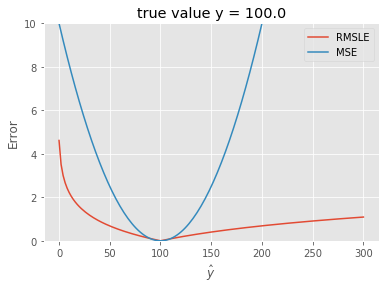

In [3]:
y = 100
y_hat = np.linspace(0, 300, 151)
# log error
error1 = np.sqrt((np.log(y+1) - np.log(y_hat + 1))**2)

# squared error
error2 = (y - y_hat)**2 /1000.

plt.plot(y_hat, error1, label='RMSLE')
plt.plot(y_hat, error2, label='MSE')
plt.xlabel('$\hat{y}$')
plt.ylabel('Error')
plt.title('true value y = %.1f' % y)
plt.legend()
plt.ylim(0, 10)

mse - одинаково штрафует
RMSLE - сильнее штрафует за не предсказание, чем пере прогноз. Например, нам нужно удовлетворить спрос покупателей, и нам это выгоднее чем переборщить с закупкой.

* Недопрогнозировать дороже, чем перепрогнозировать
* Учет эффекта масштаба

# Алгоритмы

## Метод ближайшего соседа

Метод минимально отличается от варианта с классификацией. <br\> По прежнему считаем меру "близости" между объектами, а затем усредняем значения целевого признака у *k* ближайших соседей.

Рассмотрим данные по характеристикам автомобилей Honda Accord. Названия столбцов говорят сами за себя ([обучение](http://bit.ly/1gIQs6C), [тест](http://bit.ly/IYPHrK)). 


In [118]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

In [119]:
df_train = pd.read_csv('http://bit.ly/1gIQs6C')
df_test = pd.read_csv('http://bit.ly/IYPHrK')
df_train.head()

,price,mileage,year,trim,engine,transmission
0,14995,67697,2006,ex,4 Cyl,Manual
1,11988,73738,2006,ex,4 Cyl,Manual
2,11999,80313,2006,lx,4 Cyl,Automatic
3,12995,86096,2006,lx,4 Cyl,Automatic
4,11333,79607,2006,lx,4 Cyl,Automatic


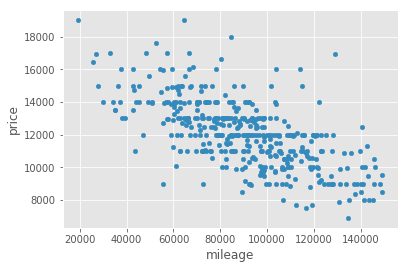

In [6]:
df_train.plot(y='price', x='mileage', kind='scatter')

 чем больше пробег , тем меньше стоимость.

Посмотроим регрессор на k ближайших соседей.

In [7]:
X_train = df_train.mileage.values.reshape(-1, 1)
y_train = df_train.price.values

X_test = df_test.mileage.values.reshape(-1, 1)
y_test = df_test.price.values

In [8]:
knn = KNeighborsRegressor(
    n_neighbors=10, 
    weights='uniform',
    metric='manhattan')
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

Text(0,0.5,'price')

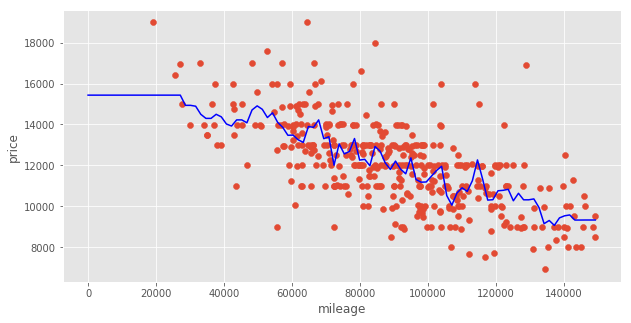

In [9]:
x = np.linspace(0, max(X_train), 100).reshape(-1, 1)
y_hat = knn.predict(x)

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.scatter(X_train, y_train)

ax.plot(x, y_hat, c='blue')
plt.xlabel('mileage')
plt.ylabel('price')

ищем 10 ближайших соседей по пробегу, смотрим их стоимость, усредняяем, берём следующую объект.

In [10]:
def plot_knn(k=5):
    knn = KNeighborsRegressor(n_neighbors=k, weights='uniform', metric='manhattan')
    knn.fit(X_train, y_train)
    
    X_train_s = np.sort(X_train, axis=0)
    y_hat = knn.predict(X_train_s.reshape(-1,1))
    plt.xlabel('mileage')
    plt.ylabel('price')

    
    plt.scatter(X_train, y_train, c='r', label='actual data')
    plt.plot(X_train_s, y_hat, c='b', label='knn, $k=%d$' % k)
    plt.legend(loc=2)
    
    return None

In [11]:
fig = interact(plot_knn, k=IntSlider(min=1, max=10, value=5))

interactive(children=(IntSlider(value=5, description='k', max=10, min=1), Output()), _dom_classes=('widget-interact',))

In [12]:
def regression_report(X_s, y_s, model, labels, score=mean_absolute_error):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
    ax = ax.flatten()

    colors = plt.cm.jet(np.linspace(0, 1, len(labels)))

    for idx, label in enumerate(labels):
        X = X_s[idx]
        y_true = y_s[idx]

        y_hat = model.predict(X)

        # Scatter
        ax[0].scatter(y_hat, y_true, color = colors[idx], alpha=0.3,
                      label='%s Score - %2.4f' % (label, score(y_true, y_hat)))

        # Resid
        resid = y_true - y_hat
        ax[1].scatter(resid, y_true, color = colors[idx], alpha=0.3, label=label)

        # Distr
        ax[2].hist(y_hat, alpha=0.5, label=label, color = colors[idx], normed=True)

        # Resid
        resid = y_true - y_hat
        ax[3].scatter(resid, y_hat, color = colors[idx], alpha=0.3, label=label)

    ax[0].legend(loc=4)
    ax[0].set_xlabel('$\hat{y}$')
    ax[0].set_ylabel('$y$')

    ax[1].legend(loc=2)
    ax[1].set_xlabel('$resid$')
    ax[1].set_ylabel('$y$')

    ax[2].legend(loc=2)
    ax[2].set_xlabel('$\hat{y}$')

    ax[3].legend(loc=2)
    ax[3].set_xlabel('$resid$')
    ax[3].set_ylabel('$\hat{y}$')

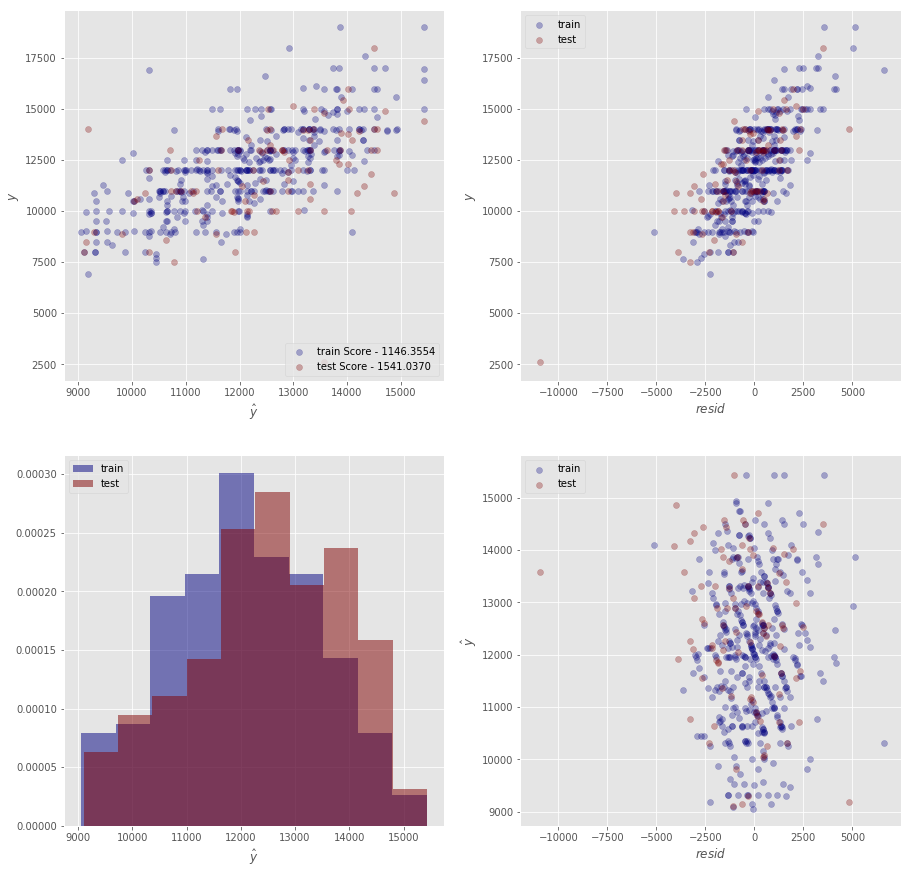

In [13]:
# парные графики . Так можно мониторить качество модели. Ищем патерны, может юыть данные плохие. может не учли 
# какой-то признак
# Проблема: смещенеие выборки. 
# 
regression_report([X_train, X_test], [y_train, y_test], knn, 
                  ['train', 'test'], score=mean_absolute_error)

## Деревья решений

Напомним себе на основе чего строится дерево решений. В каждом новом узле выбирается признак и его значение, максимизирущее прирост информативности:
$$ Gain(S, A) = I(S) - \sum\limits_v\frac{|S_v|}{|S|}\cdot I(S_v),$$ где $A$ - это некий атрибут, а $v$ - его значения, I(A) - одна из мер неопределенности, например:
* Gini index $I(S) = 1 - \sum\limits_k (p_k)^2$
* Entropy  $I(S) = -\sum\limits_k p_k \log(p_k)$
* Missclassification error  $I(S) = 1 - \max\limits_k p_k$

Как видно, для того, чтобы посчитать $I(S)$ нам нужно знать пропорции классов $p_k$. Но у нас же задача регрессии!

В этом случае, можно считать мерой неопределенности разброс значений целевого признака `y` (среднюю квадратичную ошибку относительно среднего):
$$I(S) = \frac{1}{|S|} \sum\limits_{i \in S} (y_i - c)^2 $$ 
$$ c = \frac{1}{|S|}\sum\limits_{i \in S} y_i $$

или среднюю абсолютную ошибку относительно медианы

$$I(S) = \frac{1}{|S|} \sum\limits_{i \in S} |y_i - c| $$ 
$$ c = median(\{y_i\}) \ i \in S$$


Таким образом, дерево будет выбирать такие значение признаков из `X`, что разброс `y` будет наименьшим.  

In [14]:
import subprocess
import os
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

In [15]:
tree = DecisionTreeRegressor(max_depth=2)

In [16]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Text(0,0.5,'price')

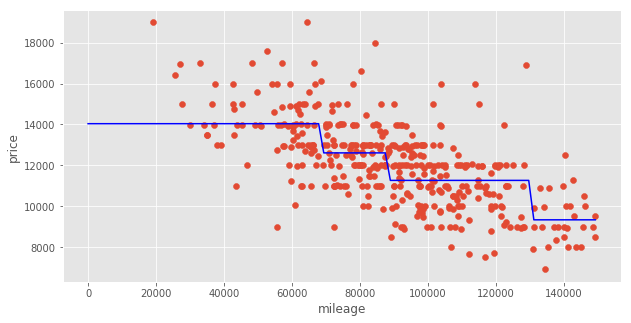

In [17]:
x = np.linspace(0, max(X_train), 100).reshape(-1, 1)
y_hat = tree.predict(x)

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.scatter(X_train, y_train)

ax.plot(x, y_hat, c='blue')
plt.xlabel('mileage')
plt.ylabel('price')

In [18]:
def plot_dec_reg(depth=1, criterion='mse', ):
    
    fig, ax = plt.subplots(1,2)
    fig.set_figwidth(20)
    
    X_train_s = np.sort(X_train, axis=0)
    
    tree = DecisionTreeRegressor(criterion=criterion, max_depth=depth)
    tree.fit(X_train, y_train)
    y_hat = tree.predict(X_train_s.reshape(-1,1))
    ax[1].set_xlabel('mileage')
    ax[1].set_ylabel('price')
    ax[1].scatter(X_train, y_train, label='actual data')
    ax[1].plot(X_train_s, y_hat, c='blue', label='decision tree \nregression')
    ax[1].legend(loc=2)
    
    try:
        with open('tree.dot', 'w') as fout:
            export_graphviz(tree, out_file=fout, feature_names=['mileage'])
        command = ["dot", "-Tpng", "tree.dot", "-o", "tree.png"]
        subprocess.check_call(command)
        ax[0].imshow(plt.imread('tree.png'))
        ax[0].axis("off")
    except:
        pass
    
    plt.show()

In [19]:
fig = interact(plot_dec_reg, depth=IntSlider(min=1, max=5, value=1), criterion=['mse', 'mae'])


interactive(children=(IntSlider(value=1, description='depth', max=5, min=1), Dropdown(description='criterion', options=('mse', 'mae'), value='mse'), Output()), _dom_classes=('widget-interact',))

Раздражает: ступеньки, не устойчевость.
Как улучшить: добавить линейную комбинацию признаков, a*milcoge + b >= _Tho_
Добавить лес,

Обратите внимание на предсказание дерева. Что с ним не так и как с бы вы предложили с этим бороться?

## Линейная регрессия

Наша задача, выявить **линейную** зависимость между признаками в $X$ и значениями в $y$:
$$\hat{y} = X\beta \quad \Leftrightarrow \quad \hat{y}^{(i)} = \beta_0 + \beta_1x^{(i)}_1 + \dots$$
То есть необходимо оценить коэффициенты $\beta_i$.

В случае линейной регрессии коэффициенты $\beta_i$ рассчитываются так, чтобы минимизировать сумму квадратов ошибок по всем наблюдениям:
$$ L(\beta) = \frac{1}{2n}(\hat{y} - y)^{\top}(\hat{y} - y) = \frac{1}{2n}(X\beta - y)^{\top}(X\beta - y) \rightarrow \min$$ $$ \Updownarrow $$  $$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 + \dots - y^{(i)})^2  \rightarrow \min $$

Несколько способов решения этой задачи:
* Градиентный спуск 
* Normal Equations (Проекционные матрицы)

### Normal Equation

Если система $$ A x = b $$ не имеет решения, то решайте $$A^\top A x = A^\top b$$
Отсюда получаем $$x = (A^\top A)^{-1} A^\top b$$

Такое же выражение для коэффициентов можно получить через матричное дифференцирование функции потерь

#### Задачка

Загрузите tutorial_dataset.csv или tutorial_dataset_2.csv в матрицу (таблицу) D. Присвойте y = D[:,0] а X = D[:, 1:].

Оцените коэффициенты линейной регрессии $\hat{y} = X\hat{\beta}$, где

$$ \hat{\beta} = (X^\top X)^{-1} X^\top y $$
Остатки модели рассчитываются как
$$ \text{res} = y - \hat{y} $$

3. Постройте два графика: 
    1. Выберите какой-нибудь признак (кроме x0) и на одном графике изобразите зависимость y~x и линию регрессии
    2. Постройте график  $\hat{y}$~остатки

In [20]:
df = pd.read_csv('./data/tutorial_dataset_2.csv')

In [27]:

## Your Code Here
# достаём данные чтобы получить красивые матрицы
X = df.iloc[:, 1:].values
y = df.iloc[:,0].values

# считаем по формолу B
# матричное умножение dot
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) 

In [28]:
beta.shape[0]

5

In [29]:
# вектор предсказания. Умножаем на коэффиценты
y_hat = X.dot(beta)
y_hat.shape

(2209,)

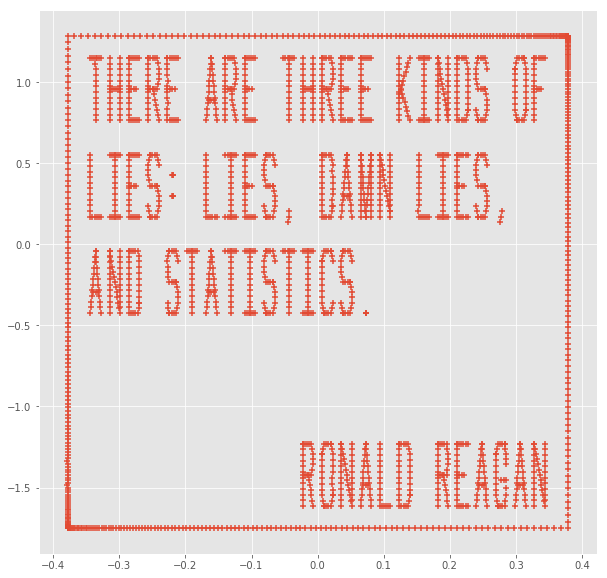

In [30]:
res = y - y_hat
plt.figure(figsize=(10,10))
plt.scatter(y_hat, res, marker='+')
# scatter строит по точкам

### Градиентный спуск

$$ L(\beta_0, \beta_1) = \frac{1}{2n}\sum_{i=1}^n(\beta_0 + \beta_1x_1^{(i)} - y^{(i)})^2$$ 

* Предположим мы выбрали какое-то начальное приближение $(\hat{\beta_0}, \hat{\beta_1})$
* Его можно постараться улучшить - надо двигаться в сторону наискорейшего убывания функции (Антиградиента!)

<center><img src='img/dir-der.gif'></center>

Пусть уравнение регрессии имеет вид $\hat{y} = \beta_0 + \beta_1x$

Функция потерь $$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1- y^{(i)})^2 $$

Посчитаем, чему равен градиент функции потерь $L(\beta_0, \beta_1):$
$$ \frac{\partial L}{\partial \beta_0} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})$$
$$ \frac{\partial L}{\partial \beta_1} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})x_1^{(i)}$$

Иногда проще это записать в виде матриц:
$$ \frac{\partial L}{\partial \beta} = X^\top(X\beta - y)$$


Метод градиентного спуска заключается в итеративном и **одновременном(!!!)** обновлении значений $\beta$ в направлении, противоположному градиенту:
$$ \beta := \beta - \alpha\frac{\partial L}{\partial \beta}$$

$\alpha$ - скорость спуска, гипер параметр который надо подбирать

Таким образом шаги алгоритма следующие:

* Задаем случайное начальное значение для $\beta$
* Пока не будет достигнуто правило останова:
    * Считаем ошибку и значение функции потерь
    * Считаем градиент
    * Обновляем коэффициенты

Выборку придется отнормировать для сходимости метода

In [31]:
X_train = (X_train - X_train.mean())/X_train.std()

In [32]:
# Просто для удобства
X_model = np.c_[np.ones(X_train.shape), X_train]
X_model.shape

(417, 2)

In [33]:
X_model[:10]

array([[ 1.        , -0.84965517],
       [ 1.        , -0.61665239],
       [ 1.        , -0.3630531 ],
       [ 1.        , -0.14000144],
       [ 1.        , -0.39028369],
       [ 1.        ,  0.279257  ],
       [ 1.        ,  1.4048907 ],
       [ 1.        ,  1.13894894],
       [ 1.        , -0.62533069],
       [ 1.        , -1.50720052]])

In [34]:
from mpl_toolkits import mplot3d

Text(0,0.5,'$\\beta_1$')

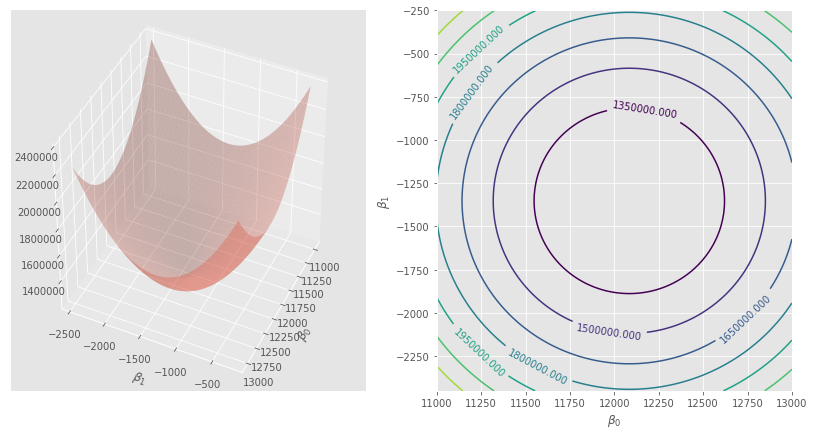

In [35]:
beta0 = np.linspace(11000 , 13000, 100)
beta1 = np.linspace(-2450, -250, 100)

B0, B1= np.meshgrid(beta0, beta1)

B_all = np.c_[B0.reshape(-1,1), B1.reshape(-1,1)].T

L = X_model.dot(B_all) - y_train.reshape(-1,1)
L = L ** 2
L = L.mean(axis=0)/2
L = L.reshape(B0.shape)


fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.view_init(40, 25)
ax.plot_surface(B0, B1, L, alpha=0.3,)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')

ax = fig.add_subplot(1, 2, 2)
contour = ax.contour(B0, B1, L)
plt.clabel(contour, inline=1, fontsize=10)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')

In [51]:
def gradient_descent(X, y, iters, alpha):
    
    costs = []
    betas = []
    
    n = y.shape[0] 
    Beta = np.random.rand(X.shape[1])
    for i in range(iters):
        y_hat = X.dot(Beta)
        # Ошибка - средне квадтротичное и остатки y_hat - y
        res = (y_hat - y)
        cost = (res**2).mean()
        grad = X.T.dot(res)
        # Градиент

        # Обновление весов
        Beta = Beta - (alpha/n)*grad # массив с текущими коэффицентами
        betas.append(Beta) # хранить историю 
        costs.append(cost) # хранение ошибок
    return Beta, costs, betas

In [52]:
Beta, costs, betas = gradient_descent(X_model, y_train, 100, 0.05)

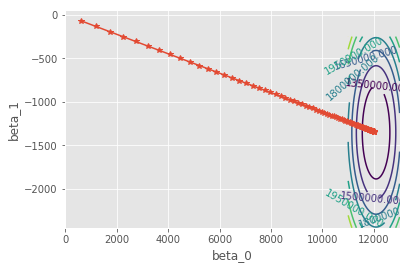

In [53]:
beta0 = np.linspace(11000 , 13000, 100)
beta1 = np.linspace(-2450, -250, 100)

B0, B1= np.meshgrid(beta0, beta1)

B_all = np.c_[B0.reshape(-1,1), B1.reshape(-1,1)].T

L = X_model.dot(B_all) - y_train.reshape(-1,1)
L = L ** 2
L = L.mean(axis=0)/2
L = L.reshape(B0.shape)

fig, ax = plt.subplots(1,1)
contour = ax.contour(B0, B1, L)
plt.clabel(contour, inline=1, fontsize=10)
ax.set_xlabel('beta_0')
ax.set_ylabel('beta_1')

betas = np.array(betas)
ax.plot(betas[:,0], betas[:,1], marker='*')


У градиентного спуска есть множество модификаций связанных. Некоторые улучшают процесс сходимости (градиент с импульсом), другие оптимизируют работу на больших выборках (стохастический градиентный спуск).

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e"><img src='http://sebastianruder.com/content/images/2016/09/contours_evaluation_optimizers.gif'></th>
    <th class="tg-031e"><img src='http://sebastianruder.com/content/images/2016/09/saddle_point_evaluation_optimizers.gif'></th>
  </tr>
</table>

[Обзор методов 1](http://sebastianruder.com/optimizing-gradient-descent/), [обзор методов 2](https://medium.com/towards-data-science/types-of-optimization-algorithms-used-in-neural-networks-and-ways-to-optimize-gradient-95ae5d39529f)

Конечно же в sklearn [имплементирован](http://scikit-learn.org/stable/modules/sgd.html) стохастический градиентный спуск с большим выбором параметов.

Стохастический градиентный достаточно гибок в использовании: 
* Его можно просто дообучать на новых данных (место того, чтобы строить новую модель с 0)
* Можно оптимизировать более сложные функции потерь
* Можно обучать на данных, которые не влезают в память

По поводу последнего, конечно же лучше использовать специализированный софт, например [Vowpal Wabbit](https://github.com/JohnLangford/vowpal_wabbit/wiki/Input-format). Да, придется писать в командной строке и записывать данные в специальном формате, но поверьте, это того стоит [(пример)](https://habrahabr.ru/company/mlclass/blog/248779/).

### Природа зависимости

Далеко не всегда переменные зависят друг от друга именно в том виде, в котором они даны. Никто не запрещает зависимость вида
$$\log(y) = \beta_0 + \beta_1\log(x_1)$$
или
$$y = \beta_0 + \beta_1\frac{1}{x_1}$$
или
$$y = \beta_0 + \beta_1\log(x_1)$$
или
$$y = \beta_0 + \beta_1 x_1^2 + \beta_2 x_2^2 + \beta_3 x_1x_2 $$
и т.д.

Не смотря на то, что могут возникать какие-то нелинейные функции - всё это сводится к **линейной** регрессии (например, о втором пункте, произведите замену $z_1 = \frac{1}{x_1}$)

#### Пример

Загрузите данные `weights.csv` c информацией о весах мозга и тел различных биологических видов. Вес тела задан в килограммах, вес могза в граммах.

In [56]:
df = pd.read_csv('./data/weights.csv', sep=';', index_col=0)
df.head()

,body_w,brain_w
species,,
Mountain Beaver,1.35,8.1
Cow,465.00,423.0
Grey Wolf,36.33,119.5
Goat,27.66,115.0
Guinea Pig,1.04,5.5


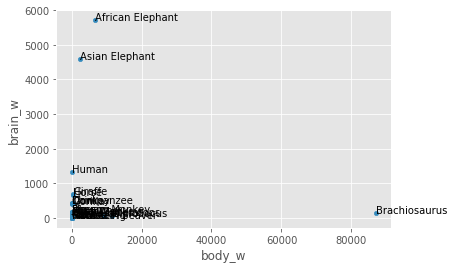

In [57]:
df.plot(x = 'body_w', y='brain_w', kind='scatter')
for k, v in df.iterrows():
    plt.annotate(k, v[:2])
# Должно получится что-то несуразное..

Теперь давайте возьмем логарифм от обеих переменных и снова нарисуем их на графике

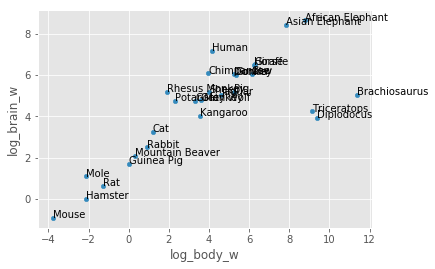

In [58]:
df['log_body_w'] = np.log(df.body_w)
df['log_brain_w'] = np.log(df.brain_w)
df.plot(x = 'log_body_w', y='log_brain_w', kind='scatter')
for k, v in df.iterrows():
    plt.annotate(k, v[2:])

## Ладно, давайте дальше в sklearn =)

In [63]:
X_train = df_train.mileage.values.reshape(-1, 1)
y_train = df_train.price.values

In [64]:
from sklearn.linear_model import LinearRegression

Обучим модель

In [67]:
model = LinearRegression() 
# нормализация признаков - 
# когда может быть полезна нормализация признаков
# тогда когда шкала признаков разная.
# норма - (признак_х - среднее)/ стандартное отклонение
# (X - X_mean ) / X_std  =>  (0,1)
# (X - X_min) / (X_max - X_min) => (0,1)
# (X - X_median) / (X_95 - X_85s) => (0,1)

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
print ('Model:\nprice = %.2f + (%.2f)*mileage' % (model.intercept_, model.coef_[0]))

Model:
price = 16762.02 + (-0.05)*mileage


In [69]:
model.intercept_

16762.024910878838

In [70]:
model.coef_

array([-0.05213421])

Нарисуем решение

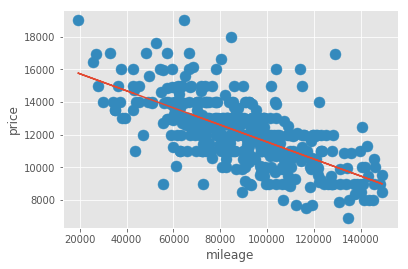

In [73]:
df_train.plot(x='mileage', y='price', kind='scatter', s=120)

## Your Code Here
y_hat  = model.predict(X_train)
plt.plot(X_train, y_hat) # рисуем модель

### Переобучение\недообучение, мультиколлинеарность и регуляризация

Одна из важнейших характеристик моделей, будь то линейная регрессия, наивные Байес и др. - их **обобщающая способность**.
Наша задача не построить "идеальную" модель, на имеющихся у нас наблюдениях, которая идеально их будет предсказывать, но и применять эту модель для новых данных.

Ниже приводятся примеры 3х моделей.

<img src=http://www.holehouse.org/mlclass/10_Advice_for_applying_machine_learning_files/Image%20%5B8%5D.png>
[Andrew's Ng Machine Learning Class - Stanford]

Второй момент, который важен для линейных моделей - **мультиколлинеарность**. Этот эффект возникает, когда пара предикторов  близка к взаимной линейной зависимости (коэффициент корреляции по модулю близок к 1). Из-за этого:

* Матрица $X^{\top} X$ становится плохо обусловленной и необратимой
* Зависимость $y = \beta_0 + \beta_1x_1 + \beta_2x_2$ перестаёт быть одназначной

С этим эффектом можно бороться несколькими способами

* Последовательно добавлять переменные в модель
* Исключать коррелируемые предикторы

В обоих случаях может помочь **регуляризация** - добавление штрафного слагаемого за сложность модели в функцию потерь. В случае линейной регрессии было:
$$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 $$
Стало (Ridge Regularization)
$$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\left[ \sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 \right] + \lambda\sum_{j=1}^{m}\beta_j^2$$
или (Lasso Regularization)
$$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\left[ \sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 \right] + \lambda\sum_{j=1}^{m}|\beta_j|$$

<center><img src='img/regul.jpg'></center>

## Выбросы в данных

Квадратичная ошибка достаточно чувствительна к выбросам. Давайте вернемся к нашим данным про автомобили и добавим туда выбросы.

Посмотрим, как поведет себя простая линейная регрессия.

In [206]:
df_train = pd.read_csv('http://bit.ly/1gIQs6C')

In [207]:
df_train.describe()

,price,mileage,year
count,417.000000,417.000000,417.0
mean,12084.242206,89725.779376,2006.0
std,2061.430034,25957.872271,0.0
min,6900.000000,19160.000000,2006.0
25%,10779.000000,71844.000000,2006.0
50%,11995.000000,89900.000000,2006.0
75%,13000.000000,106705.000000,2006.0
max,18995.000000,149269.000000,2006.0


In [208]:
X_train = df_train.mileage.values.reshape(-1, 1)
y_train = df_train.price.values

n = y_train.shape[0]

Добавляем выброс(-ы)

In [209]:
X_train = np.r_[X_train, [[250000+np.random.rand()*10000]]]
y_train = np.r_[y_train, 16000+np.random.randn()*1000]

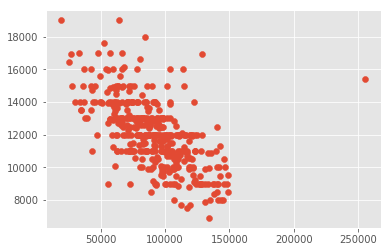

In [210]:
plt.scatter(X_train, y_train)

 Обучим 2 модели. Первая - на данных без выбросов. Вторая - на всех данных

In [211]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train[:n], y_train[:n])

model_ouliers = LinearRegression(fit_intercept=True)
model_ouliers.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

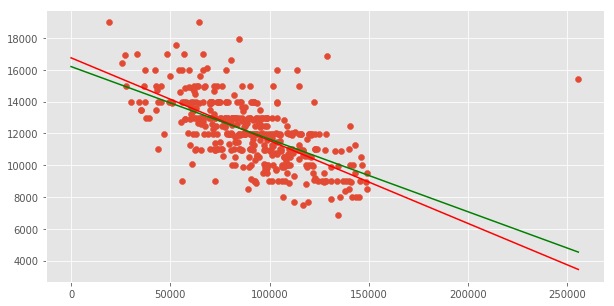

In [212]:
x = np.linspace(0, max(X_train), 100).reshape(-1, 1)
y_hat = model.predict(x)
y_hat_outliers = model_ouliers.predict(x)

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.scatter(X_train, y_train)

ax.plot(x, y_hat, c='red')
ax.plot(x, y_hat_outliers, c='green')

### RANSAC регрессия

Идея метода RANdom SAmple Consensus (RANSAC) заключается в многократном обучении модели на случайном наборе точек из исходных данных с последующим выбором лучшей модели.

То есть:
* Задаем функцию потерь
* Задаем порог $\theta$ для остатков при котором наблюдения начинают относится к выбросам
* Задаем правило останова

Шаги алгоритма следующие
1. Взять случайные K точек и обучить на них модель M
2. Сравнить ошибки на остальных точких с порогом $\theta$ и отнести к выбросам или внутренним точкам
3. Обучить модель на всех внутренних точках, оценить качество на внутренних точках
4. Повторить 1-3 пока не наступит правило останова. 
5. Вывод: модель с лучшим качеством

In [213]:
from sklearn.linear_model import RANSACRegressor

In [214]:
model_ransac = RANSACRegressor(LinearRegression())
model_ransac.fit(X_train, y_train)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

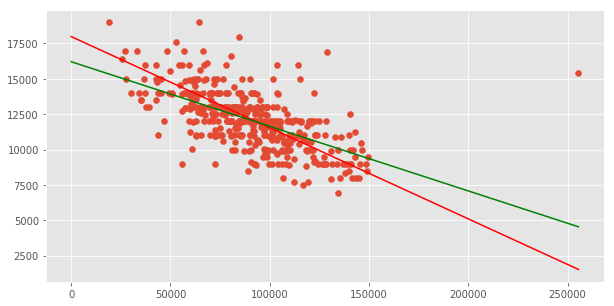

In [215]:
x = np.linspace(0, max(X_train), 100).reshape(-1, 1)
y_hat = model_ransac.predict(x)

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.scatter(X_train, y_train)

ax.plot(x, y_hat, c='red')
ax.plot(x, y_hat_outliers, c='green')

### Robust Estimators

Идея робастных методов заключается во взвешивании остатков модели таким образом, чтобы большие значения вносили меньший вклад в оценку параметров.

Таким образом, вместо минимизации квадрата остатков $$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2$$
Будут минимизироваться взвешенные остатки $$ L_w(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}\rho_i \cdot (\hat{y}^{(i)} - y^{(i)})^2,$$
где $\rho_i$ - некоторый вес

Для того, чтобы попробовать эти методы нужно будет устновить пакет `statsmodels` через `pip`

In [216]:
import statsmodels.api as sm

(0.1, -4.1)

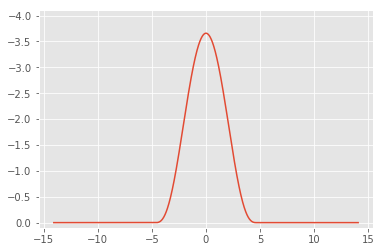

In [217]:
c = 4.685
support = np.linspace(-3*c, 3*c, 1000)
tukey = sm.robust.norms.TukeyBiweight(c=c)
plt.plot(support, tukey(support))
plt.ylim(.1, -4.1)

Полный список взвешивающих функций в модуле `statsmodels` можно найти [тут](http://statsmodels.sourceforge.net/stable/examples/notebook/generated/robust_models_1.html)

In [218]:
model_robust = sm.RLM(y_train, sm.add_constant(X_train), M=sm.robust.norms.TukeyBiweight())
model_robust = model_robust.fit()

In [219]:
model_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      y   No. Observations:                  418
Model:                            RLM   Df Residuals:                      416
Method:                          IRLS   Df Model:                            1
Norm:                   TukeyBiweight                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 15 Feb 2018                                         
Time:                        22:00:50                                         
No. Iterations:                     8                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.682e+04    249.344     67.453      0.000    1.63e+04    1.73e+04
x1            -0.0534      0.003    -20.162      0.000      -0.059      -0.048
==============================================================================

If the model instance has been used for another fit with different fit
parameters, then the fit options might not be the correct ones anymore .
"""

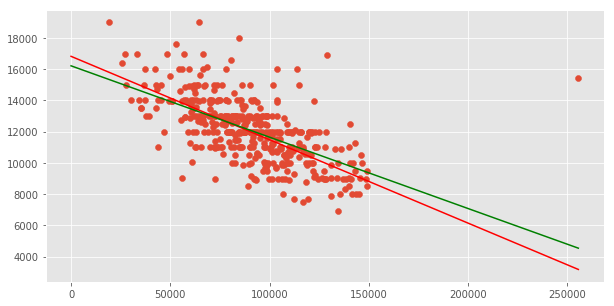

In [220]:
x = np.linspace(0, max(X_train), 100).reshape(-1, 1)
y_hat = model_robust.predict(sm.add_constant(x))

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.scatter(X_train, y_train)

ax.plot(x, y_hat, c='red')
ax.plot(x, y_hat_outliers, c='green')

### Добавим остальные признаки в простую модель модель

In [232]:
df_train = pd.read_csv('http://bit.ly/1gIQs6C')
df_train.head()

,price,mileage,year,trim,engine,transmission
0,14995,67697,2006,ex,4 Cyl,Manual
1,11988,73738,2006,ex,4 Cyl,Manual
2,11999,80313,2006,lx,4 Cyl,Automatic
3,12995,86096,2006,lx,4 Cyl,Automatic
4,11333,79607,2006,lx,4 Cyl,Automatic


In [233]:
df_train['year'].value_counts()

2006    417
Name: year, dtype: int64

In [235]:
def preprocess(df_input):
    df_input.drop('year', axis=1)
    
    df_input.loc[:, 'transmission'] = df_input.transmission.replace({
        'Automatic': 0,
        'Manual': 1
    })
    
    df_input.loc[:, 'engine'] = df_input['engine'].replace({
        '4 Cyl': 0,
        '6 Cyl': 1
    })
    
    df_input.loc[:, 'trim'] = df_input['trim'].replace({
        'ex': 0,
        'lx': 1,
        'exl': 2
    })
    
    return df_input

In [236]:
df_train_preprocess = df_train.pipe(preprocess)

In [239]:
df_train_preprocess.head()

,price,mileage,year,trim,engine,transmission
0,14995,67697,2006,0,0,1
1,11988,73738,2006,0,0,1
2,11999,80313,2006,1,0,0
3,12995,86096,2006,1,0,0
4,11333,79607,2006,1,0,0


In [238]:
y_train = df_train_preprocess.iloc[:, 0].values
X_train = df_train_preprocess.iloc[:, 1].values


In [203]:
y_train[:10]

array([14995, 11988, 11999, 12995, 11333, 10067,  8999, 10595, 13988,
       13990])

In [204]:
X_train[:10]

array([ 67697,  73738,  80313,  86096,  79607,  96966, 126150, 119255,
        73513,  50649])

In [205]:
model = LinearRegression(
    fit_intercept=True
)
model.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[ 67697  73738  80313  86096  79607  96966 126150 119255  73513  50649
  90000 114340  75270  54685  68480 107290  39144  42893 103650  59100
  96404  59466  89692  91486  90256  85976 103833  37378  45414 108590
 121435  99904 121896  70193 103927  34216 135766  89350 133721 109034
 143581  90757  93566  86005  61490  98691  60433  93862  74405  95400
  93193  70777 140130  95213 141810 106405  55592  42527  54198  97479
 127520  92731  77347  83884  82778 118646  91420 128351  85773  87453
  61059  93841 130933  73301  77635  66678 101600 143061  57052 103596
  94142 149147  61545 108481  80390  86070 107323 127920  76042 110780
  88251 131114 146363 119733  65567  71844 103659  98677  30000 114000
  78852  91877  72075 116000  69194 101148  66215  96798  35004  60328
 119365 106705 145670 122381  70233  93392  77148 104064  83014 128373
  77334  46900  74039  66578  98294  92783 109759  72498 141274  35069
  91477 100687  36497 133000  49671 127841 127271  81000  33034 116998
  96245  91055 120660  80282  95363 111919  65601  87283  80890  62836
  78363 124222  74078  80897  69891 117051  80486  89933 137117  55670
  73483  61807  93409  99974 135230  62938 112178  78697  86800 109953
 123627  52604  71507  89476 149269 118500  66860  92477  84862  62039
  55999  80831  79502  92313  86568  87319 116811  92420  65280  88119
 109734 105371 125000  97813 103008 111437  57209  43891  92167  92081
  48226 120738 138416  61171  72276 137738  82324 122413 131090 123000
  96805 105722  81869  60982  80526  81046  64326  85359  60360  62954
  76530  83829  57694  98399 100905  86086 101881  25543 107952 145863
  83558  66496  37158  78828 134450  99606  59667 112923  84109 122905
  72897  97939 119749  62654  74842  84630  62681  27624  49250 145143
  85158 118457  76270 108821 103216 115051  50824 106251 122923  84504
  84603  90364  87449  89900 104001  71793  64673  82489  72434 104985
  19160 121304  76021  84551  89973 139817  77976 114865 141011  65481
  87750 105000  83258  81010  84596  98764 101399 134260 103742 114846
 103465  67000  37795  83014  79664 110255 140036 112139  72447  87786
 118641 108797  72233  63830  59535 140576  78329 108400 105000  97573
  81844  90692  27098 129000  87410 111257  98815  55666 106320  62219
  98589  99000  98730  75445  59666  90403  75110  58911 107354  89876
  95079  82113  98700  97245  92771 140392 101774  63710  82708  70134
  94325  71000  93745 101256  88447  71287  91383 142787  64866 116741
  82525 105933  85219 119615 101734 107393 115317  56801  95111  69407
  92109  65670  82981 115786 120989  75032  98105  89218  86136  42783
  71008 101047  94777  60429 111029 108821  45346  95799 114662  64570
 109229  97717  66531 101452  63266  77937  57616  77622 109124  43549
  57353 148499  65975  72520 121642  72281  87281  70151 110129  98069
 118022  97116 100310 103457  91595  95334  66330  63070  92952 122986
  78496  97721  67564  69775  77997  61892  43034].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.